In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
from datetime import datetime, date, timedelta

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [34]:
#Inspect the dataset to see what we're working with

inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

engine.execute('SELECT * FROM measurement LIMIT 3').fetchall()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0)]

In [33]:
#Inspect the dataset to see what we're working with

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])
    
engine.execute('SELECT * FROM station LIMIT 3').fetchall()

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)]

In [57]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [89]:
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One Year From Last Data Point: ", one_year)

One Year From Last Data Point:  2016-08-23


In [205]:
# Perform a query to retrieve the data and precipitation scores
year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year).all()

In [127]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(year)
prcp_df = prcp_df.set_index('date', drop=True)
prcp_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [128]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_index(ascending=True)
prcp_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


In [133]:
prcp_df = prcp_df.dropna()
prcp_df = prcp_df.rename(columns={"prcp": "precipitation"})
prcp_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


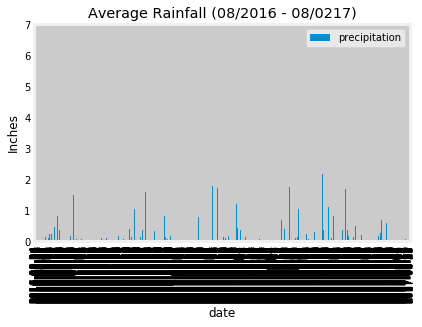

<Figure size 432x288 with 0 Axes>

In [134]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(kind="bar")
plt.ylabel("Inches")

plt.title("Average Rainfall (08/2016 - 08/0217)")

plt.show()
plt.tight_layout()

In [122]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean = prcp_df["prcp"].mean()
max = prcp_df["prcp"].max()
min = prcp_df["prcp"].min()

print(f"""
Between August 2016 and August 2017:
- The average daily rainfall in Hawaii was {round(mean, 2)} inches per day.
- The most rain ever recorded in a day was {max} inches.
- The least rain ever recorded in a day was {min} inches.
""")


Between August 2016 and August 2017:
- The average daily rainfall in Hawaii was 0.18 inches per day.
- The most rain ever recorded in a day was 6.7 inches.
- The least rain ever recorded in a day was 0.0 inches.



In [153]:
# Design a query to show how many stations are available in this dataset?
stations = engine.execute('SELECT station FROM station').fetchall()
stations
station_counter = 0
for station in stations:
    station_counter += 1
print(f"This dataset pulls from {station_counter} weather stations in Hawaii.")

This dataset pulls from 9 weather stations in Hawaii.


In [171]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
engine.execute('SELECT COUNT(station), station FROM measurement GROUP BY station ORDER BY COUNT(station) DESC').fetchall()

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [182]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

min_temp = engine.execute('SELECT MIN(tobs) FROM measurement WHERE station = "USC00519281"').fetchall()
max_temp = engine.execute('SELECT MAX(tobs) FROM measurement WHERE station = "USC00519281"').fetchall()
mean_temp = engine.execute('SELECT AVG(tobs) FROM measurement WHERE station = "USC00519281"').fetchall()

print(f"""
At station USC00519281 the lowest temperature recorded is {min_temp}, the
highest temperature recorded is {max_temp}, and the average temperature
over the course of the year is {mean_temp}.
""")


At station USC00519281 the lowest temperature recorded is [(54.0,)], the
highest temperature recorded is [(85.0,)], and the average temperature
over the course of the year is [(71.66378066378067,)].



In [201]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

busiest_station = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > one_year).\
    filter(Measurement.station == "USC00519281").all()

station_df = pd.DataFrame(busiest_station)
station_df = station_df.set_index('date')
station_df.head()

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


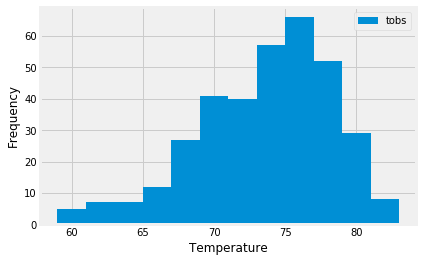

In [203]:
station_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.show()

In [12]:
temps_2 = session.query(Measurement.date, Measurement.tobs, func.max(Measurement.tobs)).\
    filter(Measurement.date >= 2010-01-01).\
    filter(Measurement.date <= 2010-03-01).all()

print(temps_2)

SyntaxError: invalid token (<ipython-input-12-ab297b15684a>, line 2)